# Python - Symbolic Mathematics (`sympy`)

In [1]:
%matplotlib inline

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

### `sympy` treats stuff fundementally different than `numpy`

In [3]:
np.sqrt(8)

In [4]:
sp.sqrt(8)

In [5]:
np.pi

In [6]:
sp.pi

### sympy has its own way to handle rational numbers

In [7]:
sp.Rational(3,5)

In [8]:
sp.Rational(3,5) + sp.Rational(1,3)

#### Least Common Multiple

In [9]:
sp.lcm(3,5)

#### Adding `.n()` to the end of a sympy expression will `evaluate` expression

In [10]:
sp.pi.n()

In [11]:
sp.pi.n(100)

#### `nsimplify()` will sort-of do the reverse

In [12]:
sp.nsimplify(0.125)

In [13]:
sp.nsimplify(4.242640687119286)

In [14]:
sp.nsimplify(sp.pi, tolerance=1e-2)

In [15]:
sp.nsimplify(sp.pi, tolerance=1e-5)

In [16]:
sp.nsimplify(sp.pi, tolerance=1e-6)

### ... to $\infty$ and beyond

In [17]:
sp.oo

In [18]:
sp.oo + 3

In [19]:
1e19 < sp.oo

True

---
### Primes

In [20]:
# List of primes in the range 0 -> 100

list(sp.primerange(0,100))

In [21]:
# The 100th prime number

sp.prime(100)

In [22]:
# The next prime after 2020

sp.nextprime(2020)

In [23]:
# The prime factors of today's date

sp.factorint(2262020)

---
# Symbolic

### You have to explicitly tell `SymPy` what symbols you want to use.

In [24]:
x, y, z = sp.symbols('x y z')
a, b, c = sp.symbols('a b c')
mu, rho = sp.symbols('mu rho')

### Expressions are then able use these symbols

In [25]:
my_equation = 2 * x + y

my_equation

In [26]:
my_equation + 3

In [27]:
my_equation - x

In [28]:
my_equation / x

In [29]:
my_greek_equation = mu**2 / rho * (a + b)

my_greek_equation

### `SymPy` has all sorts of ways to manipulates symbolic equations

In [30]:
sp.simplify(my_equation / x)

In [31]:
another_equation = (x + 2) * (x - 3)

another_equation

In [32]:
sp.expand(another_equation)

In [33]:
long_equation = 2*y*x**3 + 12*x**2 - x + 3 - 8*x**2 + 4*x + x**3 + 5 + 2*y*x**2 + x*y

long_equation

In [34]:
sp.collect(long_equation,x)

In [35]:
sp.collect(long_equation,y)

### You can evaluate equations for specific values

In [36]:
trig_equation = a*sp.sin(2*x + y) + b*sp.cos(x + 2*y)

trig_equation

In [37]:
trig_equation.subs({a:2, b:3, x:4, y:5})

In [38]:
trig_equation.subs({a:2, b:3, x:4, y:5}).n()

In [39]:
sp.expand(trig_equation, trig=True)

In [40]:
sp.collect(sp.expand(trig_equation, trig=True),sp.cos(x))

#### You can evaluate/simplify equations sybolically

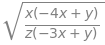

In [41]:
my_equation_xyz = sp.sqrt((x * (y - 4*x)) / (z * (y - 3*x)))

my_equation_xyz

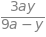

In [42]:
my_equation_x = (3 * a * y) / (9 * a - y)

my_equation_x

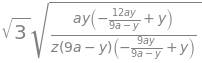

In [43]:
my_new_xyz = my_equation_xyz.subs(x, my_equation_x)

my_new_xyz

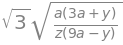

In [44]:
sp.simplify(my_new_xyz)

---
# System of equations

$$
\begin{array}{c}
9x - 2y = 5 \\
-2x + 6y = 10 \\
\end{array}
\hspace{3cm}
\left[
\begin{array}{cc}
9 & -2 \\
-2 & 6 \\
\end{array}
\right]
\left[
\begin{array}{c}
x\\
y
\end{array}
\right]
=
\left[
\begin{array}{c}
5\\
10
\end{array}
\right]
$$

In [45]:
a_matrix = sp.Matrix([[9, -2],
                      [-2, 6]])

b_matrix = sp.Matrix([[5],
                      [10]])

In [46]:
a_matrix, b_matrix

⎛⎡9   -2⎤  ⎡5 ⎤⎞
⎜⎢      ⎥, ⎢  ⎥⎟
⎝⎣-2  6 ⎦  ⎣10⎦⎠

In [47]:
a_matrix.inv()

⎡3/25  1/25⎤
⎢          ⎥
⎣1/25  9/50⎦

In [48]:
a_matrix.inv() * a_matrix

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

In [49]:
a_matrix.inv() * b_matrix

⎡1⎤
⎢ ⎥
⎣2⎦

---
# Solving equations - `solve`

$$
\begin{array}{c}
9x - 2y = 5 \\
-2x + 6y = 10 \\
\end{array}
$$

In [50]:
equation_a = 9*x - 2*y - 5
equation_b = -2*x + 6*y - 10

In [51]:
sp.solve([equation_a, equation_b], [x,y])

In [52]:
yet_another_equation = x**3 + x + 10

yet_another_equation

In [53]:
sp.solve(yet_another_equation,x)

#### ... complex numbers

In [54]:
sp.I

In [55]:
a_complex_number = 2 + 3 * sp.I

a_complex_number

### ... solving more symbolically

In [56]:
symbolic_equation = a*x**2 + b*x +c

symbolic_equation

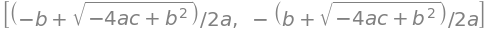

In [57]:
sp.solve(symbolic_equation, x)

---
## Calculus

In [58]:
symbolic_equation

In [59]:
sp.diff(symbolic_equation,x)

In [60]:
sp.diff(symbolic_equation,x,2)

In [61]:
sp.integrate(symbolic_equation,x)

In [62]:
sp.integrate(symbolic_equation,(x,0,5))   # limits x = 0 to 5

In [63]:
sp.integrate(symbolic_equation,(x,0,5)).subs({a:2, b:7, c:3}).n()

In [64]:
trig_equation

In [65]:
sp.diff(trig_equation,x)

In [66]:
sp.integrate(trig_equation,x)

---
### Limits

In [67]:
limit_equation = (1 + (1 / x)) ** x

limit_equation

$$\lim _{x\to 5 }\left(1+{\frac {1}{x}}\right)^{x}$$

In [68]:
sp.limit(limit_equation, x, 5)

In [69]:
sp.limit(limit_equation, x, 5).n()

$$\lim _{x\to \infty }\left(1+{\frac {1}{x}}\right)^{x}$$

In [70]:
sp.limit(limit_equation, x, sp.oo)

In [71]:
sp.limit(limit_equation, x, sp.oo).n()

---
### Summation

$$ \sum{\frac {x^{a}}{a!}} $$

In [72]:
sum_equation = x**a / sp.factorial(a)

sum_equation

$$ \sum _{a=0}^{3}{\frac {x^{a}}{a!}} $$

In [73]:
sp.summation(sum_equation, [a, 0, 3])

In [74]:
sp.summation(sum_equation.subs({x:1}), [a, 0, 3])

In [75]:
sp.summation(sum_equation.subs({x:1}), [a, 0, 3]).n()

$$ \sum _{a=0}^{10}{\frac {x^{a}}{a!}} $$

In [76]:
sp.summation(sum_equation.subs({x:1}), [a, 0, 10]).n()

$$ \sum _{a=0}^{\infty}{\frac {x^{a}}{a!}} $$

In [77]:
sp.summation(sum_equation, [a, 0, sp.oo])

---
## Let's do some graphing stuff ...

$$
\large y_1 = \frac{x^3}{4} - 3x
$$

### Need to create a `numpy` array to do the graphing

In [78]:
# 200 points between -2pi and 2pi

my_np_x = np.linspace(-2*np.pi, 2*np.pi, 200)

In [79]:
my_np_y1 = my_np_x ** 3 / 4 - 3 * my_np_x

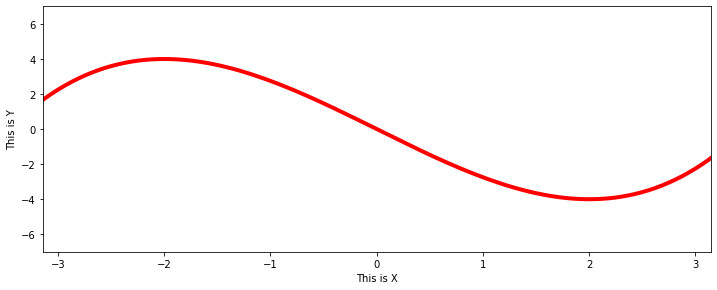

In [80]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,4)

fig.tight_layout()

ax.set_ylim(-7,7)
ax.set_xlim(-np.pi,np.pi)

ax.set_xlabel("This is X")
ax.set_ylabel("This is Y")

ax.plot(my_np_x, my_np_y1, color='r', marker='None', linestyle='-', linewidth=4);

---
### Fourier Series

In [81]:
# Make a SymPy version of the equation

my_sp_y1 = x ** 3 / 4 - 3 * x

my_sp_y1

In [82]:
my_fourier = sp.fourier_series(my_sp_y1, (x, -sp.pi, sp.pi))

my_fourier

In [83]:
my_fourier.truncate(3).n(2)

In [84]:
# Make NumPy versions of the term to plot

my_np_1term = -4.1 * np.sin(my_np_x)
my_np_2term = -4.1 * np.sin(my_np_x) + 0.91 * np.sin(2*my_np_x)
my_np_3term = -4.1 * np.sin(my_np_x) + 0.91 * np.sin(2*my_np_x) - 0.47 * np.sin(3*my_np_x)

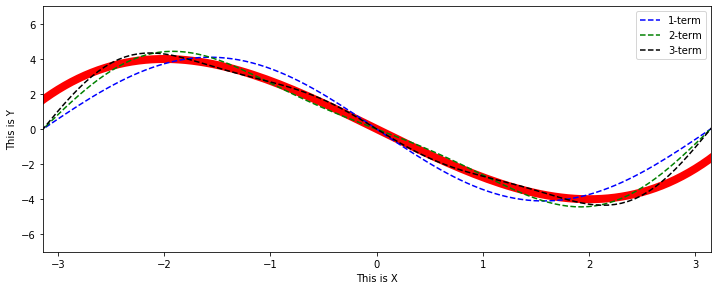

In [85]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,4)

fig.tight_layout()

ax.set_ylim(-7,7)
ax.set_xlim(-np.pi,np.pi)

ax.set_xlabel("This is X")
ax.set_ylabel("This is Y")

ax.plot(my_np_x, my_np_y1, color='r', marker='None', linestyle='-', linewidth=8)

ax.plot(my_np_x, my_np_1term, color='b', marker='None', linestyle='--', label="1-term")
ax.plot(my_np_x, my_np_2term, color='g', marker='None', linestyle='--', label="2-term")
ax.plot(my_np_x, my_np_3term, color='k', marker='None', linestyle='--', label="3-term")

ax.legend(loc = 0);

---
### Another Function

$$
\large y_2 = 2\,\sin(5x) \ e^{-x}
$$

In [86]:
my_np_y2 = 2 * np.sin(5 * my_np_x) * np.exp(-my_np_x)

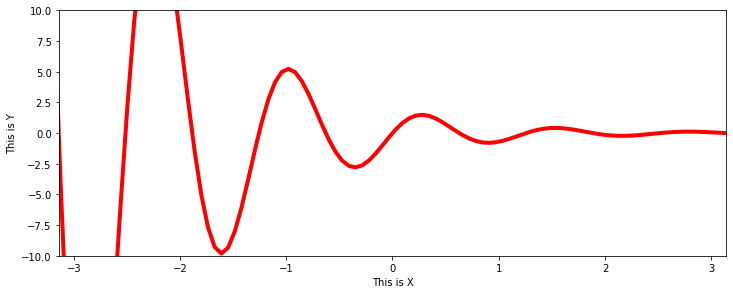

In [87]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,4)

fig.tight_layout()

ax.set_ylim(-10,10)
ax.set_xlim(-np.pi,np.pi)

ax.set_xlabel("This is X")
ax.set_ylabel("This is Y")

ax.plot(my_np_x, my_np_y2, color='r', marker='None', linestyle='-', linewidth=4);

### Taylor Expansions

In [88]:
my_sp_y2 = 2 * sp.sin(5 * x) * sp.exp(-x)
my_sp_y2

In [89]:
my_taylor = sp.series(my_sp_y2, x, x0 = 0)

my_taylor

#### if you want more terms

* n = magnitude of the highest term
* n = 8 means all terms up to x$^{8}$ or $\mathcal{O}(8)$

In [90]:
my_taylor = sp.series(my_sp_y2, x, x0 = 0, n=8)

my_taylor

In [91]:
my_taylor.removeO()

In [92]:
my_taylor.removeO().n(2)

## General Equation Solving - `nsolve`

$$
\large y_1 = \frac{x^3}{4} - 3x\\
\large y_2 = 2\,\sin(5x) \ e^{-x}
$$

### Where do they cross? - The graph

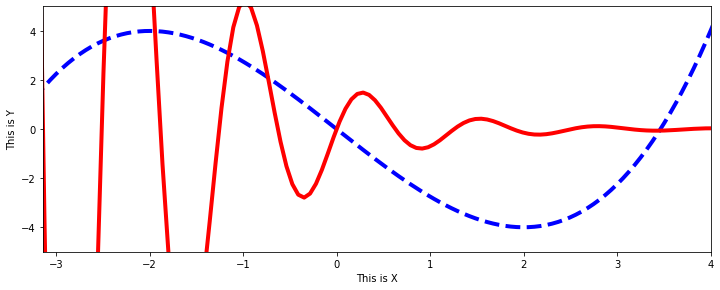

In [93]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,4)

fig.tight_layout()

ax.set_ylim(-5,5)
ax.set_xlim(-np.pi,4)

ax.set_xlabel("This is X")
ax.set_ylabel("This is Y")

ax.plot(my_np_x, my_np_y1, color='b', marker='None', linestyle='--', linewidth = 4)
ax.plot(my_np_x, my_np_y2, color='r', marker='None', linestyle='-', linewidth = 4);

### Where do they cross? - The `sympy` solution

In [94]:
my_sp_y1, my_sp_y2

In [95]:
my_guess = 3.3

sp.nsolve(my_sp_y1 - my_sp_y2, x, my_guess)

In [96]:
all_guesses = (3.3, 0, -0.75)

for val in all_guesses:
    result = sp.nsolve(my_sp_y1 - my_sp_y2, x, val)
    print(result)

3.45350892879700
0
-0.734137909210086


### Your guess has to be (somewhat) close or the solution will not converge:

In [97]:
my_guess = -40

sp.nsolve(my_sp_y1 - my_sp_y2, x, my_guess)

ValueError: Could not find root within given tolerance. (0.00000568855229913544960444 > 2.16840434497100886801e-19)
Try another starting point or tweak arguments.

# `SymPy` can do *so* much more. It really is magic. 

## Complete documentation can be found [here](http://docs.sympy.org/latest/index.html)